In [1]:
import sys 
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras. losses import categorical_crossentropy
from keras.optimizers import Adam 
from keras.regularizers import l2
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data  =  pd.read_csv('fer2013.csv')  #import the data 
print(data.info())
data.head()   # third colonn => usage : Training or PrivateTest or PublicTest

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
X =  []
y = []
X_v = []
y_v = []

In [4]:
for i, row in data.iterrows():
    val = row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
            X.append(np.array(val))
            y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
            X_v.append(np.array(val))
            y_v.append(row['emotion'])
    except:
         print("error")
            

In [5]:
X = np.array(X, 'float32')
X_v = np.array(X_v,'float32')
y = np.array(y,'float32')
y_v = np.array(y_v,'float32')

print(len(X))
print(len(X_v))

28709
3589


In [6]:
X  = X - np.mean(X, axis =0)
X  = X/ np.std(X, axis =0)   #Normalize the data

X_v  = X_v - np.mean(X_v, axis =0)
X_v  = X_v/ np.std(X_v, axis =0)

In [7]:
X = X.reshape(X.shape[0], 48, 48, 1)
X_v = X_v.reshape(X_v.shape[0], 48, 48, 1)

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = (X.shape[1:])))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2), strides = (2,2)))
model.add(Dropout(0.5))

In [10]:
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = (X.shape[1:])))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',input_shape = (X.shape[1:])))
model.add(MaxPooling2D(pool_size =(2,2), strides = (2,2)))
model.add(Dropout(0.5))

In [11]:
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape = (X.shape[1:])))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu',input_shape = (X.shape[1:])))
model.add(MaxPooling2D(pool_size =(2,2), strides = (2,2)))

In [12]:
model.add(Flatten())

model.add(Dense(8*64, activation ='relu'))
model.add(Dropout(0.5))

In [13]:
model.add(Dense(8*64, activation ='relu'))
model.add(Dropout(0.5))

In [14]:
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0

In [15]:
early_stopping = EarlyStopping(      #add a callback function to gain in time
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=8, # how many epochs to wait before stopping
    restore_best_weights=True,
)

checkpoint_filepath = './tmp/checkpoints'    #save the best model
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer =Adam(), metrics = ['accuracy'])


In [17]:
history = model.fit(X,y, 32, epochs = 50, verbose = 1, validation_data=(X_v,y_v), callbacks=[early_stopping, model_checkpoint_callback], shuffle = True)

Epoch 1/50
898/898 [==============================] - 171s 190ms/step - loss: 1.8194 - accuracy: 0.2436 - val_loss: 1.7120 - val_accuracy: 0.2998
Epoch 2/50
898/898 [==============================] - 176s 197ms/step - loss: 1.6594 - accuracy: 0.3307 - val_loss: 1.4844 - val_accuracy: 0.4179
Epoch 3/50
898/898 [==============================] - 179s 199ms/step - loss: 1.5387 - accuracy: 0.3946 - val_loss: 1.4320 - val_accuracy: 0.4283
Epoch 4/50
898/898 [==============================] - 179s 199ms/step - loss: 1.4628 - accuracy: 0.4258 - val_loss: 1.3828 - val_accuracy: 0.4670
Epoch 5/50
898/898 [==============================] - 184s 205ms/step - loss: 1.4204 - accuracy: 0.4447 - val_loss: 1.3226 - val_accuracy: 0.4837
Epoch 6/50
898/898 [==============================] - 181s 201ms/step - loss: 1.3719 - accuracy: 0.4647 - val_loss: 1.2947 - val_accuracy: 0.4999
Epoch 7/50
898/898 [==============================] - 182s 203ms/step - loss: 1.3649 - accuracy: 0.4687 - val_loss: 1.2942 -

In [18]:
model.save('my_model_from_scratch')   #save the model

INFO:tensorflow:Assets written to: my_model_from_scratch\assets


Minimum validation loss: 1.1747221946716309


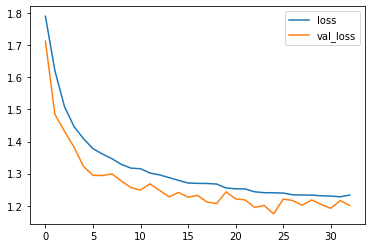

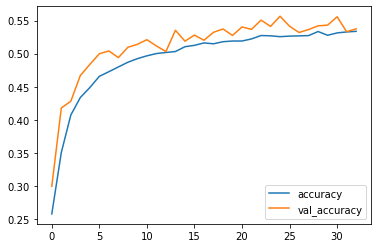

In [20]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))